In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'thread-scalability': '../results/thread-scalability'
}

prefix = 'output_'
experiments = {k:{} for k in paths}

In [5]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                subtype_files.append(pd.read_csv(experiment_file).set_index('epoch'))
                experiments[experiment_type][subtype] = subtype_files

In [6]:
for experiment in experiments:
    subset = []
    for category in experiments[experiment]:
        df = pd.concat(experiments[experiment][category], axis=1)
        clean_df = pd.DataFrame()
        for column in set(df.columns):
            clean_df[column] = (df[column].sum(axis=1) - df[column].max(axis=1) - df[column].min(axis=1))/3
        subset.append(clean_df.rename(columns=lambda x: category+"_"+x))
    experiments[experiment] = subset

In [7]:
for experiment in experiments:
    experiments[experiment] = pd.concat(experiments[experiment], axis=1)

## Analysis

#### Size

In [8]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['size-scalability'].columns if m in c]

In [9]:
metrics2columns

{'f1': ['15640_f1', '11730_f1', '5865_f1'],
 'recall': ['15640_recall', '11730_recall', '5865_recall'],
 'cost': ['15640_cost', '11730_cost', '5865_cost'],
 'precision': ['15640_precision', '11730_precision', '5865_precision'],
 'accuracy': ['15640_accuracy', '11730_accuracy', '5865_accuracy']}

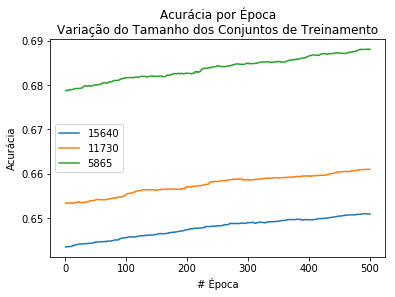

In [10]:
df = experiments['size-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['size-scalability']+"/size-accuracy.eps", format='eps')

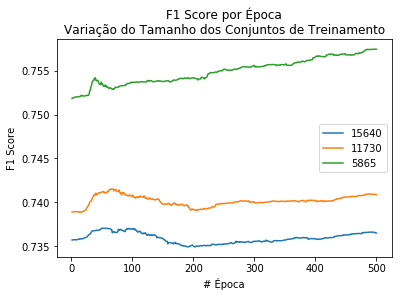

In [11]:
df = experiments['size-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("F1 Score por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("F1 Score")
plt.savefig(paths['size-scalability']+"/size-f1.eps", format='eps')

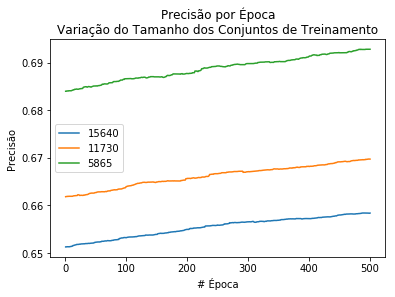

In [12]:
df = experiments['size-scalability'][metrics2columns['precision']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Precisão por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Precisão")
plt.savefig(paths['size-scalability']+"/size-precision.eps", format='eps')

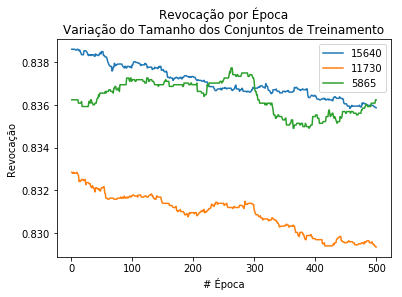

In [13]:
df = experiments['size-scalability'][metrics2columns['recall']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Revocação por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Revocação")
plt.savefig(paths['size-scalability']+"/size-recall.eps", format='eps')

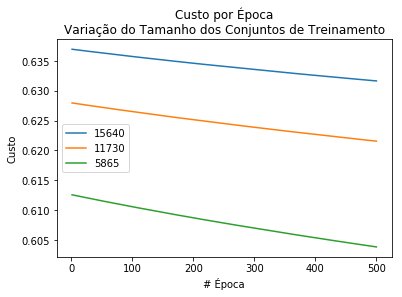

In [14]:
df = experiments['size-scalability'][metrics2columns['cost']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Custo por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Custo")
plt.savefig(paths['size-scalability']+"/size-cost.eps", format='eps')

#### Epochs

In [15]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['thread-scalability'].columns if m in c]

In [16]:
metrics2columns

{'f1': ['4_f1', '2_f1', '3_f1', '1_f1'],
 'recall': ['4_recall', '2_recall', '3_recall', '1_recall'],
 'cost': ['4_cost', '2_cost', '3_cost', '1_cost'],
 'precision': ['4_precision', '2_precision', '3_precision', '1_precision'],
 'accuracy': ['4_accuracy', '2_accuracy', '3_accuracy', '1_accuracy']}

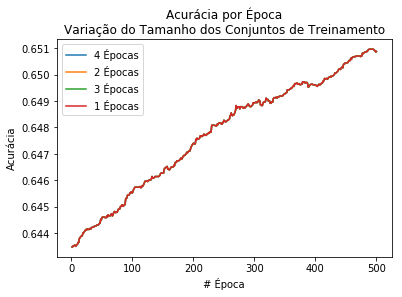

In [20]:
df = experiments['thread-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['thread-scalability']+"/thread-accuracy.eps", format='eps')

Text(0, 0.5, 'Acurácia')

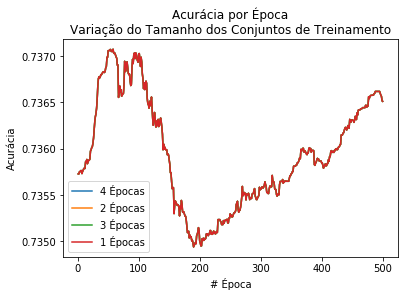

In [21]:
df = experiments['thread-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")

In [22]:
df = experiments['size-scalability'][metrics2columns['accuracy']]
df = df.loc[-1]

KeyError: "['4_accuracy' '2_accuracy' '3_accuracy' '1_accuracy'] not in index"

## Teste

In [23]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'thread-scalability': '../results/thread-scalability'
}

prefix = 'output_'
experiments = {k:{} for k in paths}

In [24]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                subtype_files.append(pd.read_csv(experiment_file).set_index('epoch'))
                experiments[experiment_type][subtype] = subtype_files

In [25]:
for experiment in experiments:
    subset = []
    for category in experiments[experiment]:
        df = pd.concat(experiments[experiment][category], axis=1)
        clean_df = pd.DataFrame()
        for column in set(df.columns):
            clean_df[column] = (df[column].sum(axis=1) - df[column].max(axis=1) - df[column].min(axis=1))/3
        subset.append(clean_df.rename(columns=lambda x: category+"_"+x))
    experiments[experiment] = subset

In [26]:
experiments['size-scalability'][3].loc[-1]

IndexError: list index out of range

In [27]:
clean_df['f1']

epoch
 1      0.735727
 2      0.735727
 3      0.735751
 4      0.735751
 5      0.735763
 6      0.735763
 7      0.735730
 8      0.735754
 9      0.735765
 10     0.735786
 11     0.735786
 12     0.735786
 13     0.735860
 14     0.735860
 15     0.735883
 16     0.735837
 17     0.735857
 18     0.735874
 19     0.735875
 20     0.735888
 21     0.735974
 22     0.735987
 23     0.736012
 24     0.736021
 25     0.736059
 26     0.736114
 27     0.736208
 28     0.736290
 29     0.736346
 30     0.736378
          ...   
 472    0.736469
 473    0.736469
 474    0.736449
 475    0.736460
 476    0.736460
 477    0.736562
 478    0.736542
 479    0.736562
 480    0.736574
 481    0.736577
 482    0.736577
 483    0.736577
 484    0.736580
 485    0.736580
 486    0.736595
 487    0.736599
 488    0.736619
 489    0.736619
 490    0.736619
 491    0.736619
 492    0.736619
 493    0.736619
 494    0.736619
 495    0.736619
 496    0.736599
 497    0.736578
 498    0.736567
 499    